# CS 6140 Machine Learning: Assignment - 2 (Total Points: 100)
## Prof. Ahmad Uzair





## Question 1 - Support Vector Machine and MLP  (30 points)



 In this problem you will be applying Support Vector Machine and Multi layer perceptron for binary classification.



You will train and test Support Vector Machine (SVM) and Multi-layer Perceptron (MLP) classifiers that aim for minimum probability of classification error. You may use any standard library of your choice. The SVM should use a Gaussian (radial-basis) kernel. The MLP should be a single-hidden layer model with your choice of activation functions for all perceptrons.

Generate 1000 independent and identically distributed (iid) samples for training and 5000 iid samples for testing. All data for class L ∈ {0, 1}, which are equiprobable and two dimensional, should be generated as follows:


x = r<sub>L</sub> * [cos(θ) sin(θ)]<sup>T</sup> + n

where,

 θ ∼ Uniform[−π, π],

 n ∼ N(0, σ<sup>2</sup>I), Note: N represents the Gaussian distribution 

 r<sub>0</sub> = 2, r<sub>1</sub> = 4, σ = 1


Note: The two class sample sets will be highly overlapping two concentric disks, and due to angular symmetry, we anticipate the best classification boundary to be a circle between the two disks. Your SVM and MLP models will try to approximate it.

Use the training data with 10-fold cross-validation to determine the best hyperparameters (box constraints parameter and Gaussian kernel width for the SVM, number of perceptrons in the hidden layer for the MLP). Once these hyperparameters are set, train your final SVM and MLP classifier using the entire training data set. Apply your trained SVM and MLP classifiers to the test data set and estimate the probability of error from this data set.

Show the following: 

(1) visual and numerical demonstrations of the K-fold cross-validation process indicating how the hyperparameters for SVM and MLP classifiers are set.

(2) visual and numerical demonstrations of the performance of your SVM and MLP classifiers on the test dataset.


Hint: For hyperparameter selection, you may show the performance estimates for various choices and indicate where the best result is achieved. For test performance, you may show the data and classification boundary superimposed, along with an estimated probability of error from the samples.


In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
random.seed(8)

random_n = np.random.multivariate_normal([0, 0], np.identity(2), 6000)
random_theta = np.random.uniform(-np.pi, np.pi, 6000)
random_labels = np.random.randint(2, size = 6000)

fea = []
for i in range(6000):
    if random_labels[i] == 0:
        x = 2 * np.array([np.cos(random_theta[i]), np.sin(random_theta[i])]).T + random_n[i]
    else:
        x = 4 * np.array([np.cos(random_theta[i]), np.sin(random_theta[i])]).T + random_n[i]
    fea.append(x)

data = np.concatenate((np.array(fea), np.array([random_labels]).T), axis = 1)

df = pd.DataFrame(data, columns = ['x0', 'x1', 'Label'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(df.iloc[:, : 2], df.iloc[:, 2], shuffle = False, train_size = 1000)

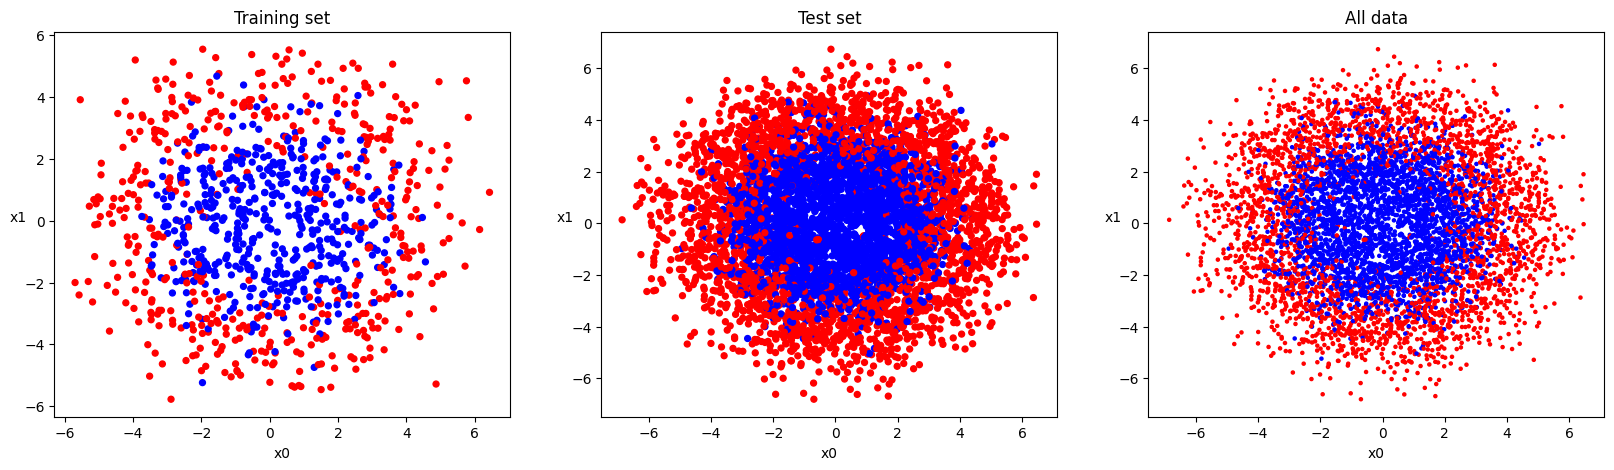

In [3]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 5))
ax1.scatter(x_train['x0'], x_train['x1'], s = 18, c = y_train.map(lambda t: 'r' if t == 1 else 'b'))
ax1.set_title('Training set')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1', rotation='horizontal')

ax2.scatter(x_test['x0'], x_test['x1'], s = 18, c = y_test.map(lambda t: 'r' if t == 1 else 'b'))
ax2.set_title('Test set')
ax2.set_xlabel('x0')
ax2.set_ylabel('x1', rotation='horizontal')

ax3.scatter(df['x0'], df['x1'], s = 5, c = df['Label'].map(lambda t: 'r' if t == 1 else 'b'))
ax3.set_title('All data')
ax3.set_xlabel('x0')
ax3.set_ylabel('x1', rotation='horizontal')

fig1.show()

## (1). Select Hyperparameters

In [4]:
def svc_param_selection(x_, y_, k_folds = 10):
    cs = [0.1, 1, 10, 20]
    gammas = [0.1, 1, 2, 4, 6, 8, 10]
    param_grid = {'C': cs, 'gamma': gammas}
    grid_search = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv = k_folds)
    grid_search.fit(x_, y_)

    params = list(zip(grid_search.cv_results_['params'], list(grid_search.cv_results_['mean_test_score'])))
    for i in sorted(params, key = lambda x: x[1], reverse = True):
        print(i)

    return grid_search.best_params_, grid_search.best_score_, params

def mlp_param_selection(x_, y_, k_folds = 10):
    hidden_units = []
    for i in range(1, 26):
        hidden_units.append((i, ))
    param_grid = {'hidden_layer_sizes': hidden_units, 'max_iter': [2000]}
    grid_search = model_selection.GridSearchCV(MLPClassifier(), param_grid, cv = k_folds, refit = 'accuracy_score')
    grid_search.fit(x_, y_)

    params = list(zip(grid_search.cv_results_['params'], list(grid_search.cv_results_['mean_test_score'])))
    for i in sorted(params, key = lambda x: x[1], reverse = True):
        print(i)

    return grid_search.best_params_, grid_search.best_score_, params

#### Numerical results from hyperparameters of SVM

In [5]:
best_params_svm, best_score_svm, params_svm = svc_param_selection(x_train, y_train, 10)
print('Best Parameters for SVM: ', best_params_svm, end = '')
print(': ', best_score_svm)

({'C': 20, 'gamma': 0.1}, 0.819)
({'C': 1, 'gamma': 0.1}, 0.817)
({'C': 10, 'gamma': 0.1}, 0.817)
({'C': 0.1, 'gamma': 0.1}, 0.8150000000000001)
({'C': 0.1, 'gamma': 1}, 0.8109999999999999)
({'C': 0.1, 'gamma': 2}, 0.8099999999999999)
({'C': 1, 'gamma': 1}, 0.807)
({'C': 1, 'gamma': 2}, 0.806)
({'C': 0.1, 'gamma': 4}, 0.804)
({'C': 1, 'gamma': 4}, 0.8030000000000002)
({'C': 10, 'gamma': 1}, 0.8019999999999999)
({'C': 20, 'gamma': 1}, 0.7980000000000002)
({'C': 1, 'gamma': 6}, 0.7969999999999999)
({'C': 1, 'gamma': 8}, 0.796)
({'C': 0.1, 'gamma': 6}, 0.795)
({'C': 10, 'gamma': 4}, 0.788)
({'C': 1, 'gamma': 10}, 0.786)
({'C': 10, 'gamma': 2}, 0.784)
({'C': 10, 'gamma': 6}, 0.779)
({'C': 20, 'gamma': 2}, 0.779)
({'C': 20, 'gamma': 4}, 0.7780000000000001)
({'C': 20, 'gamma': 6}, 0.772)
({'C': 10, 'gamma': 8}, 0.768)
({'C': 10, 'gamma': 10}, 0.767)
({'C': 20, 'gamma': 8}, 0.759)
({'C': 20, 'gamma': 10}, 0.759)
({'C': 0.1, 'gamma': 8}, 0.6679999999999999)
({'C': 0.1, 'gamma': 10}, 0.534)
Bes

#### Visual results from hyperparameters of SVM

In [6]:
def get_degree_gamma():
    C = []
    gamma = [[], [], [], []]
    sc = [[], [], [], []]
    for param, score in params_svm:
        if param['C'] == 0.1:
            gamma[0].append(param['gamma'])
            sc[0].append(score)
        elif param['C'] == 1:
            gamma[1].append(param['gamma'])
            sc[1].append(score)
        elif param['C'] == 10:
            gamma[2].append(param['gamma'])
            sc[2].append(score)
        elif param['C'] == 20:
            gamma[3].append(param['gamma'])
            sc[3].append(score)
    return np.array(C), np.array(gamma), np.array(sc)

svm_C, svm_gamma, svm_score = get_degree_gamma()

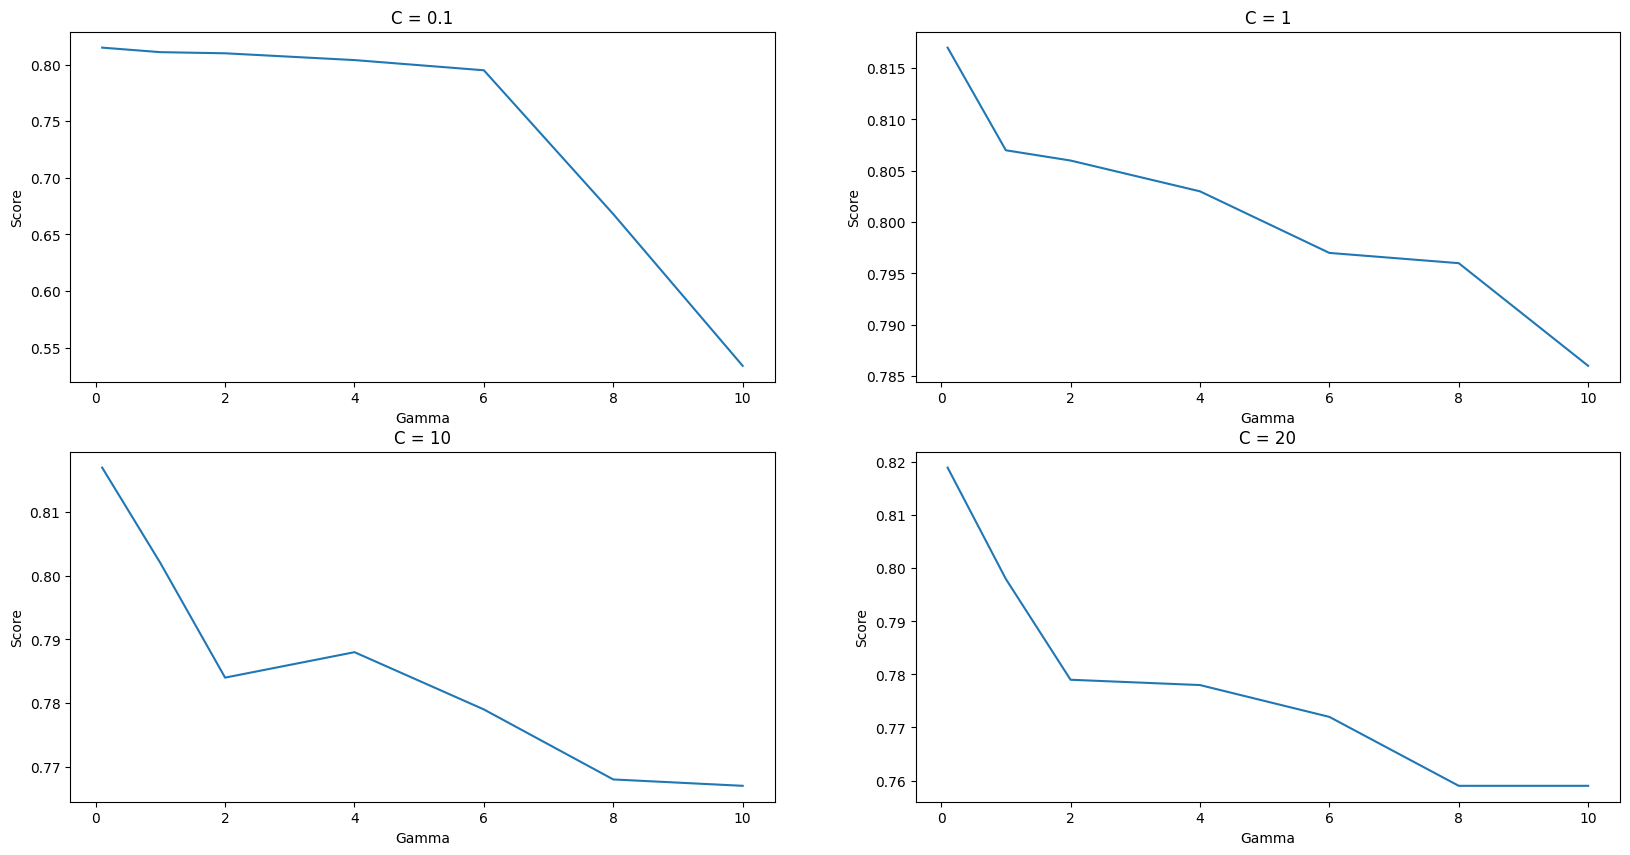

In [7]:
fig2, axes = plt.subplots(2, 2, figsize = (20, 10))

axes[0, 0].plot(svm_gamma[0], svm_score[0])
axes[0, 0].set_title('C = 0.1')
axes[0, 0].set_xlabel('Gamma')
axes[0, 0].set_ylabel('Score')

axes[0, 1].plot(svm_gamma[1], svm_score[1])
axes[0, 1].set_title('C = 1')
axes[0, 1].set_xlabel('Gamma')
axes[0, 1].set_ylabel('Score')

axes[1, 0].plot(svm_gamma[2], svm_score[2])
axes[1, 0].set_title('C = 10')
axes[1, 0].set_xlabel('Gamma')
axes[1, 0].set_ylabel('Score')

axes[1, 1].plot(svm_gamma[3], svm_score[3])
axes[1, 1].set_title('C = 20')
axes[1, 1].set_xlabel('Gamma')
axes[1, 1].set_ylabel('Score')

fig2.show()

#### Numerical results from hyperparameters of MLP

In [8]:
best_params_mlp, best_score_mlp, params_mlp = mlp_param_selection(x_train, y_train, 10)
print('Best Parameters for MLP: ', best_params_mlp, end = '')
print(': ', best_score_mlp)

({'hidden_layer_sizes': (14,), 'max_iter': 2000}, 0.8240000000000001)
({'hidden_layer_sizes': (19,), 'max_iter': 2000}, 0.8240000000000001)
({'hidden_layer_sizes': (17,), 'max_iter': 2000}, 0.8230000000000001)
({'hidden_layer_sizes': (24,), 'max_iter': 2000}, 0.8229999999999998)
({'hidden_layer_sizes': (25,), 'max_iter': 2000}, 0.8220000000000001)
({'hidden_layer_sizes': (16,), 'max_iter': 2000}, 0.8210000000000001)
({'hidden_layer_sizes': (22,), 'max_iter': 2000}, 0.8210000000000001)
({'hidden_layer_sizes': (8,), 'max_iter': 2000}, 0.821)
({'hidden_layer_sizes': (18,), 'max_iter': 2000}, 0.8200000000000001)
({'hidden_layer_sizes': (10,), 'max_iter': 2000}, 0.8190000000000002)
({'hidden_layer_sizes': (23,), 'max_iter': 2000}, 0.8190000000000002)
({'hidden_layer_sizes': (15,), 'max_iter': 2000}, 0.818)
({'hidden_layer_sizes': (20,), 'max_iter': 2000}, 0.818)
({'hidden_layer_sizes': (21,), 'max_iter': 2000}, 0.818)
({'hidden_layer_sizes': (13,), 'max_iter': 2000}, 0.817)
({'hidden_layer_

#### Visual results from hyperparameters of MLP

In [9]:
def get_hidden_units():
    units = []
    acc = []
    for param, a in params_mlp:
        units.append(param['hidden_layer_sizes'][0])
        acc.append(a)

    return np.array(units), np.array(acc)

mlp_units, mlp_acc = get_hidden_units()

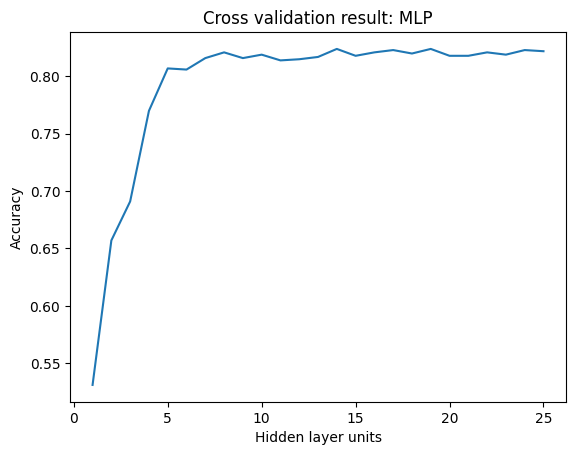

In [10]:
fig3 = plt.figure()
plt.plot(mlp_units, mlp_acc)
plt.title('Cross validation result: MLP')
plt.xlabel('Hidden layer units')
plt.ylabel('Accuracy')
fig3.show()

## (2). Performance

In [11]:
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)

#### Performance of SVM on test set

Epochs: 50		Acc: 0.5038		MSE: 0.4962
Epochs: 100		Acc: 0.4974		MSE: 0.5026
Epochs: 150		Acc: 0.6238		MSE: 0.3762
Epochs: 200		Acc: 0.8100		MSE: 0.1900
Epochs: 250		Acc: 0.7910		MSE: 0.2090
Epochs: 300		Acc: 0.7720		MSE: 0.2280
Epochs: 350		Acc: 0.8206		MSE: 0.1794
Epochs: 400		Acc: 0.8098		MSE: 0.1902
Epochs: 450		Acc: 0.8038		MSE: 0.1962
Epochs: 500		Acc: 0.8278		MSE: 0.1722
Epochs: 550		Acc: 0.8248		MSE: 0.1752
Epochs: 600		Acc: 0.8370		MSE: 0.1630
Epochs: 650		Acc: 0.8334		MSE: 0.1666
Epochs: 700		Acc: 0.8332		MSE: 0.1668
Epochs: 750		Acc: 0.8334		MSE: 0.1666
Epochs: 800		Acc: 0.8316		MSE: 0.1684
Epochs: 850		Acc: 0.8322		MSE: 0.1678
Epochs: 900		Acc: 0.8328		MSE: 0.1672
Epochs: 950		Acc: 0.8318		MSE: 0.1682
Epochs: 1000		Acc: 0.8314		MSE: 0.1686


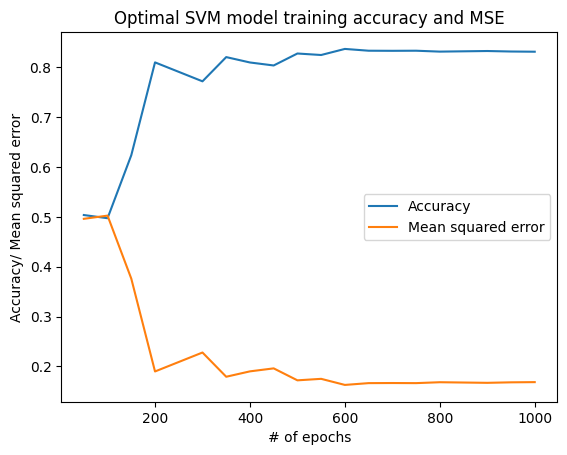

In [12]:
svm_epochs = []
svm_accs = []
svm_mses = []
for e in range(50, 1001, 50):
    svm_clf = svm.SVC(kernel = 'rbf', C = best_params_svm['C'], gamma = best_params_svm['gamma'], max_iter = e)
    svm_clf.fit(x_train, y_train)
    y_pred_svm = svm_clf.predict(x_test)
    svm_acc = metrics.accuracy_score(y_pred_svm, y_test)
    svm_mse = metrics.mean_squared_error(y_pred_svm, y_test)

    svm_epochs.append(e)
    svm_accs.append(svm_acc)
    svm_mses.append(svm_mse)
    print('Epochs: %s\t\tAcc: %.4f\t\tMSE: %.4f' % (e, svm_acc, svm_mse))

fig4 = plt.figure()

plt.title('Optimal SVM model training accuracy and MSE')
plt.xlabel('# of epochs')
plt.ylabel('Accuracy/ Mean squared error')
plt.plot(svm_epochs, svm_accs, label = 'Accuracy')
plt.plot(svm_epochs, svm_mses, label = 'Mean squared error')
plt.legend()

fig4.show()

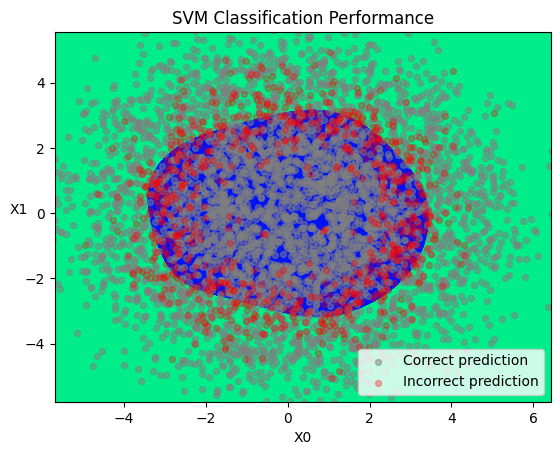

In [13]:
svm_clf = svm.SVC(kernel = 'rbf', C = best_params_svm['C'], gamma = best_params_svm['gamma'], max_iter = 2000).fit(x_train, y_train)
svm_prediction = plt.figure()

svm_x_min, svm_x_max = x_train['x0'].min(), x_train['x0'].max()
svm_y_min, svm_y_max = x_train['x1'].min(), x_train['x1'].max()
svm_xx, svm_yy = np.meshgrid(np.arange(svm_x_min, svm_x_max, 0.02), np.arange(svm_y_min, svm_y_max, 0.02))

svm_y_pred = svm_clf.predict(x_test)
svm_y_p = svm_clf.predict(np.c_[svm_xx.ravel(), svm_yy.ravel()])
svm_y_p = svm_y_p.reshape(svm_xx.shape)

svm_corr_x0 = []
svm_corr_x1 = []
svm_incorr_x0 = []
svm_incorr_x1 = []
for x, y, y_p in zip(np_x_test, np_y_test, svm_y_pred):
    if y == y_p:
        svm_corr_x0.append(x[0])
        svm_corr_x1.append(x[1])
    else:
        svm_incorr_x0.append(x[0])
        svm_incorr_x1.append(x[1])

plt.contourf(svm_xx, svm_yy, svm_y_p, cmap = plt.cm.winter, alpha = 1)
plt.scatter(svm_corr_x0, svm_corr_x1, s = 18, c = 'grey', alpha = 0.5, label = 'Correct prediction')
plt.scatter(svm_incorr_x0, svm_incorr_x1, s = 18, c = 'r', alpha = 0.3, label = 'Incorrect prediction')
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1', rotation = 'horizontal')
plt.xlim(svm_xx.min(), svm_xx.max())
plt.ylim(svm_yy.min(), svm_yy.max())
plt.title('SVM Classification Performance')

svm_prediction.show()

#### Performance of MLP on test set


Epochs: 50		Acc: 0.7956		MSE: 0.2044
Epochs: 100		Acc: 0.8334		MSE: 0.1666
Epochs: 150		Acc: 0.8290		MSE: 0.1710
Epochs: 200		Acc: 0.8322		MSE: 0.1678
Epochs: 250		Acc: 0.8352		MSE: 0.1648
Epochs: 300		Acc: 0.8342		MSE: 0.1658
Epochs: 350		Acc: 0.8342		MSE: 0.1658
Epochs: 400		Acc: 0.8362		MSE: 0.1638
Epochs: 450		Acc: 0.8330		MSE: 0.1670
Epochs: 500		Acc: 0.8360		MSE: 0.1640
Epochs: 550		Acc: 0.8370		MSE: 0.1630
Epochs: 600		Acc: 0.8354		MSE: 0.1646
Epochs: 650		Acc: 0.8386		MSE: 0.1614
Epochs: 700		Acc: 0.8360		MSE: 0.1640
Epochs: 750		Acc: 0.8342		MSE: 0.1658
Epochs: 800		Acc: 0.8402		MSE: 0.1598
Epochs: 850		Acc: 0.8320		MSE: 0.1680
Epochs: 900		Acc: 0.8344		MSE: 0.1656
Epochs: 950		Acc: 0.8338		MSE: 0.1662
Epochs: 1000		Acc: 0.8360		MSE: 0.1640


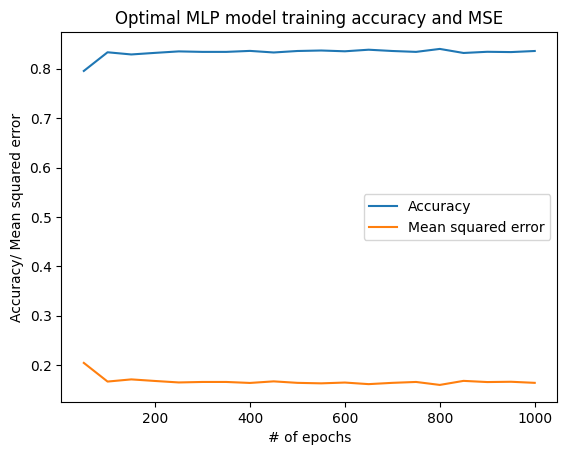

In [14]:
mlp_epochs = []
mlp_accs = []
mlp_mses = []
for e in range(50, 1001, 50):
    mlp_clf = MLPClassifier(hidden_layer_sizes = best_params_mlp['hidden_layer_sizes'], max_iter = e)
    mlp_clf.fit(x_train, y_train)
    y_pred_mlp = mlp_clf.predict(x_test)
    mlp_acc = metrics.accuracy_score(y_pred_mlp, y_test)
    mlp_mse = metrics.mean_squared_error(y_pred_mlp, y_test)

    mlp_epochs.append(e)
    mlp_accs.append(mlp_acc)
    mlp_mses.append(mlp_mse)
    print('Epochs: %s\t\tAcc: %.4f\t\tMSE: %.4f' % (e, mlp_acc, mlp_mse))

fig5 = plt.figure()

plt.title('Optimal MLP model training accuracy and MSE')
plt.xlabel('# of epochs')
plt.ylabel('Accuracy/ Mean squared error')
plt.plot(mlp_epochs, mlp_accs, label = 'Accuracy')
plt.plot(mlp_epochs, mlp_mses, label = 'Mean squared error')
plt.legend()

fig5.show()

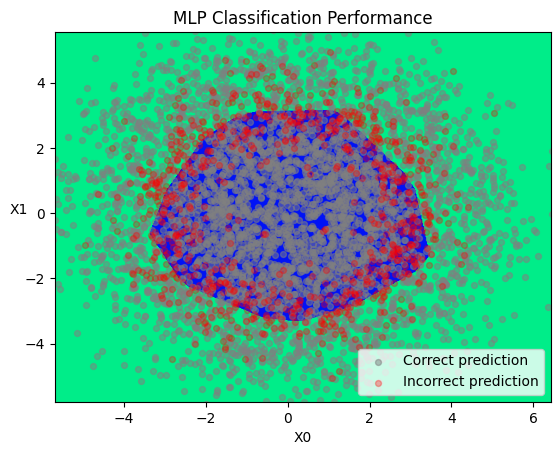

In [15]:
mlp_clf = MLPClassifier(hidden_layer_sizes = best_params_mlp['hidden_layer_sizes'], max_iter = 2000).fit(x_train, y_train)
mlp_prediction = plt.figure()

mlp_x_min, mlp_x_max = x_train['x0'].min(), x_train['x0'].max()
mlp_y_min, mlp_y_max = x_train['x1'].min(), x_train['x1'].max()
mlp_xx, mlp_yy = np.meshgrid(np.arange(mlp_x_min, mlp_x_max, 0.02), np.arange(mlp_y_min, mlp_y_max, 0.02))

mlp_y_pred = mlp_clf.predict(x_test)
mlp_y_p = mlp_clf.predict(np.c_[mlp_xx.ravel(), mlp_yy.ravel()])
mlp_y_p = mlp_y_p.reshape(mlp_xx.shape)

mlp_corr_x0 = []
mlp_corr_x1 = []
mlp_incorr_x0 = []
mlp_incorr_x1 = []
for x, y, y_p in zip(np_x_test, np_y_test, svm_y_pred):
    if y == y_p:
        mlp_corr_x0.append(x[0])
        mlp_corr_x1.append(x[1])
    else:
        mlp_incorr_x0.append(x[0])
        mlp_incorr_x1.append(x[1])

plt.contourf(mlp_xx, mlp_yy, mlp_y_p, cmap = plt.cm.winter, alpha = 1)
plt.scatter(mlp_corr_x0, mlp_corr_x1, s = 18, c = 'grey', alpha = 0.5, label = 'Correct prediction')
plt.scatter(mlp_incorr_x0, mlp_incorr_x1, s = 18, c = 'r', alpha = 0.3, label = 'Incorrect prediction')
plt.legend()
plt.xlabel('X0')
plt.ylabel('X1', rotation = 'horizontal')
plt.xlim(mlp_xx.min(), mlp_xx.max())
plt.ylim(mlp_yy.min(), mlp_yy.max())
plt.title('MLP Classification Performance')

mlp_prediction.show()